# **Cherry Blossom Data Modeling and Evaluating**

## Objectives

- Answer business requirement 2:

  > The client has expressed an interest in determining the presence of powdery mildew on a given leaf.

## Inputs

The output includes image shape embeddings stored as a pickle (.pkl) file, which contains the extracted representations of the images from the test, train, and validation folders, including their respective subfolders.

## Outputs

- Images Distribution Plot: A visualisation depicting the distribution of images across the train, validation, and test sets. This plot provides insights into the dataset's composition and the balance between the different sets.
- Label Distribution Bar Chart: A bar chart illustrating the distribution of labels in the dataset. This visualisation helps understand the frequency of different classes or categories present in the data.
- Set Distribution Pie Chart: A pie chart showcasing the distribution of images across the train, validation, and test sets. This chart presents the proportions or percentages of images in each set, giving a comprehensive overview of the dataset partition.
- Image Augmentation: An augmentation technique applied to the images, which involves performing various transformations such as rotation, scaling, or flipping. This process enhances the diversity of the dataset and helps improve model generalization.
- Augmented Images Plot: Plots showcasing the augmented images for each set, providing a visual representation of the transformations applied.
- Class Indices for Prediction Inference: Indices assigned to each class label to facilitate prediction inference in the output.
- Machine Learning Model Creation and Summary: The creation of a machine learning model specific to the task at hand. A summary of the model's architecture, including the number of parameters and layer configurations, is displayed.
- Model Training: The training of the machine learning model using the provided dataset. During this process, the model learns to make predictions based on the input data and the associated labels.
- Model Saving: The saved model is stored for future use or deployment in production environments.
Learning Curve Plot: A plot illustrating the model's performance over training epochs. This plot shows the trend of accuracy or loss metrics as the model learns from the training data.
- Model Evaluation: The evaluation of the trained model's performance using saved evaluation files. This includes calculations of accuracy, plotting of the ROC (Receiver Operating Characteristic) curve, and generation of a classification report.
- Classification Report: Detailed metrics and statistics summarizing the model's performance. This includes accuracy, precision, recall, and F1-score values, which can vary based on the specific model (Model A, Model B, or Model C).
- Confusion Matrix Plot: A visual representation of the confusion matrix, which displays the predicted labels versus the true labels. This plot helps identify any patterns or trends in misclassifications.
- Evaluation Results Saving: The saving of evaluation results, including accuracy, classification reports, and confusion matrix, in a pickle file format for future reference or analysis.
- Prediction on Random Image File: The model's prediction on a randomly selected image file, providing an example of the model's inference capabilities on unseen data.

## Additional Comments

- To meet the client's requirements and enhance data understanding, multiple versions of the data were plotted. These versions provided additional insights and catered to potential requests for deeper comprehension.

- The construction of the Convolutional Neural Network (CNN) prioritized achieving high accuracy while minimizing both loss and training time. The CNN architecture was meticulously designed to strike a balance between model size and performance. It was carefully kept as compact as possible without compromising accuracy or falling victim to overfitting.

- Further details regarding hyperparameter optimization, as well as an account of the trial and error phase, have been extensively documented in both the readme.md file. These resources provide in-depth analysis, explanations, and insights into the process of fine-tuning the model for optimal performance.



---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/kuro/Desktop/PP5 Project/pp5-mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
work_dir = os.getcwd()
work_dir

'/Users/kuro/Desktop/PP5 Project/pp5-mildew-detection-in-cherry-leaves'

---

## Set the input directories

The set, train, test and validation paths

In [4]:
my_data_dir = 'inputs/cherry-leaves-dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
test_path = my_data_dir + '/test'
val_path = my_data_dir + '/validation'

## Set the output directory

In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if os.path.exists(os.path.join(work_dir, 'outputs', version)):
    print('Old version is already available. Please create a new version.')
else:
    os.makedirs(file_path)

Old version is already available. Please create a new version.


## Set the label names

In [6]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


## Set image shape

In [7]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

----

## Image Distribution

Counts the number of images per set and label

----

### Import the libraries

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

In [10]:
import plotly.express as px

# Create an empty DataFrame to store frequency information
df_freq = pd.DataFrame([])

# Iterate over the folders ('train', 'test', 'validation') and labels
for folder in ['train', 'test', 'validation']:
    for label in labels:
        # Calculate the count of images in the specific folder and label
        count = len(os.listdir(my_data_dir + '/' + folder + '/' + label))

        # Append the frequency information to the DataFrame
        df_freq = pd.concat(
            [df_freq, pd.DataFrame(data={
                'Set': folder,
                'Label': label,
                'Count': [count]
                })]
            )

        # Print the count of images for the current folder and label
        print(f"* {folder} - {label}: {count} images")

print("\n")

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images




### Label Distribution - Bar Chart

In [11]:
# Create a bar chart using Plotly Express
fig = px.bar(
    df_freq,  # DataFrame containing the data
    x="Set",  # Specify the x-axis as 'Set' column in DataFrame
    y="Count",  # Specify the y-axis as 'Count' column in DataFrame
    color='Label',  # Color the bars based on 'Label' column
    title="Cherry Leaves Dataset",  # Set the chart title
    text_auto=True  # Enable automatic text placement on bars
)

# Customize the layout of the chart
fig.update_layout(
    autosize=False,  # Disable automatic sizing
    width=800,  # Set the width of the chart
    height=500  # Set the height of the chart
)

# Display the chart
fig.show()

# Save the chart as an image file
# fig.write_image(f'{file_path}/number_leaves_sets.png', format='png', engine='kaleido')
# I cannot get the line above to save the image for the life of me. This error just keeps
# coming up:
# ValueError: Failed to start Kaleido subprocess. Error stream:

### Set Distribution - Pie Chart

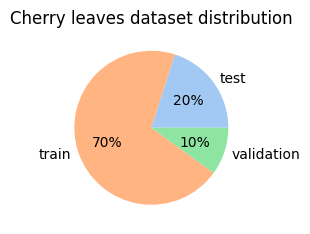

In [12]:
# Get the list of folders in the specified directory
folders = os.listdir(my_data_dir)

data = []  # List to store the counts of images per folder

# Iterate over each folder
for folder in folders:
    n = 0  # Variable to store the count of images for the current folder
    for label in labels:
        # Count the number of images in the folder and increment the total count
        n += len(os.listdir(my_data_dir + '/' + folder + '/' + label))
    data.append(n)  # Append the total count to the data list

# Set the figure size based on DPI
px = 1 / plt.rcParams['figure.dpi']
plt.subplots(figsize=(800*px, 250*px))

# Define colors for the pie chart
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.pie(data, labels=folders, colors=colors, autopct='%.0f%%')
plt.title('Cherry leaves dataset distribution')

# Save the pie chart as an image file
plt.savefig(f'{file_path}/sets_distribution_pie.png', bbox_inches='tight', dpi=150)

# Display the pie chart
plt.show()

## Image data augmentation

### Import ImageDataGenerator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialise ImageDataGenerator

### Setting the batch size

In [15]:
batch_size = 16

### Augment training image set

In [16]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented training image set

(16, 256, 256, 3)


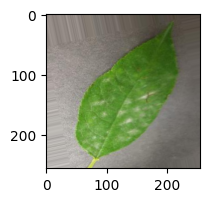

(16, 256, 256, 3)


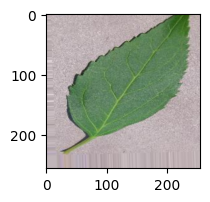

(16, 256, 256, 3)


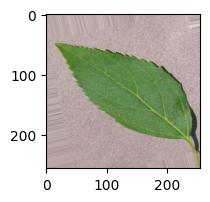

In [20]:
for _ in range(3):
    plt.figure(figsize=(2, 2))
    img, label = train_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()


### Augment validation image set

In [21]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented validation image set

(16, 256, 256, 3)


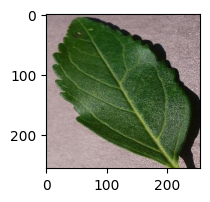

(16, 256, 256, 3)


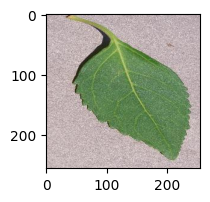

(16, 256, 256, 3)


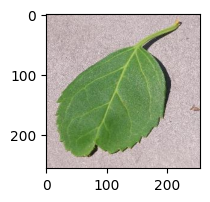

In [22]:
for _ in range(3):
    plt.figure(figsize=(2, 2))
    img, label = validation_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

### Augment test image set

In [23]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented test image set

(16, 256, 256, 3)


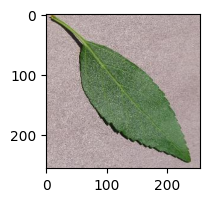

(16, 256, 256, 3)


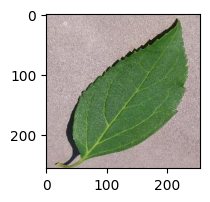

(16, 256, 256, 3)


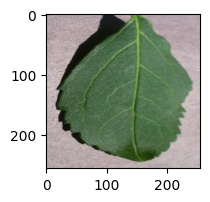

In [24]:
for _ in range(3):
    plt.figure(figsize=(2, 2))
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

### Save the class_indices

In [25]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

## Model Creation

### Import Packages

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad

### Model

- The model's rationale and justification can be found in the README.md file accompanying this project. It represents the culmination of rigorous iterations and improvements, designed to address and fulfill Business Requirement #2. 
- This final version of the model stands as the definitive foundation for accurate and reliable predictions within the project's scope.

In [27]:
def create_tf_model():
    model = Sequential()  # Initialize a sequential model

    ### Input layer
    model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation='relu'))  # Add a convolutional layer with 32 filters and ReLU activation
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Add a max pooling layer

    ### Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu'))  # Add another convolutional layer with 32 filters and ReLU activation
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Add a max pooling layer
    model.add(Conv2D(64, (3, 3), activation='relu'))  # Add a third convolutional layer with 64 filters and ReLU activation
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Add a max pooling layer

    model.add(Flatten())  # Flatten the output from the previous layers

    ### Fully connected layer
    model.add(Dense(64, activation='relu'))  # Add a fully connected layer with 64 units and ReLU activation
    model.add(Dropout(.2))  # Add a dropout layer with a dropout rate of 0.2

    ### Output layer
    model.add(Dense(2, activation='softmax'))  # Add the output layer with 2 units and softmax activation

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adagrad',
                  metrics=['accuracy'])  # Compile the model with categorical cross-entropy loss, Adagrad optimizer, and accuracy metric

    return model  # Return the constructed model

In [28]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

### Early Stopping

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1, patience=2)
m_checkpoint = ModelCheckpoint(filepath='outputs/v1/powdery_mildew_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

### Fit model for training

In [30]:
model = create_tf_model()
model.fit(train_set,
          batch_size=batch_size,
          epochs=32,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop, m_checkpoint],
          verbose=1
          )

Epoch 1/32
184/184 [==============================] - 35s 186ms/step - loss: 0.5453 - accuracy: 0.7266 - val_loss: 0.3481 - val_accuracy: 0.8714
Epoch 2/32


/Users/kuro/Desktop/PP5 Project/pp5-mildew-detection-in-cherry-leaves/env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



184/184 [==============================] - 35s 191ms/step - loss: 0.3833 - accuracy: 0.8281 - val_loss: 0.2834 - val_accuracy: 0.8786
Epoch 3/32
184/184 [==============================] - 35s 190ms/step - loss: 0.3217 - accuracy: 0.8638 - val_loss: 0.3540 - val_accuracy: 0.8500
Epoch 4/32
184/184 [==============================] - 35s 187ms/step - loss: 0.2851 - accuracy: 0.8784 - val_loss: 0.2208 - val_accuracy: 0.9143
Epoch 5/32
184/184 [==============================] - 34s 186ms/step - loss: 0.2588 - accuracy: 0.8930 - val_loss: 0.2276 - val_accuracy: 0.8857
Epoch 6/32
184/184 [==============================] - 35s 190ms/step - loss: 0.2205 - accuracy: 0.9141 - val_loss: 0.1676 - val_accuracy: 0.9381
Epoch 7/32
184/184 [==============================] - 35s 188ms/step - loss: 0.1927 - accuracy: 0.9304 - val_loss: 0.1382 - val_accuracy: 0.9548
Epoch 8/32
184/184 [==============================] - 35s 189ms/step - loss: 0.1732 - accuracy: 0.9402 - val_loss: 0.1142 - val_accuracy: 0.9

-----

## Model Performance

Model learning curve

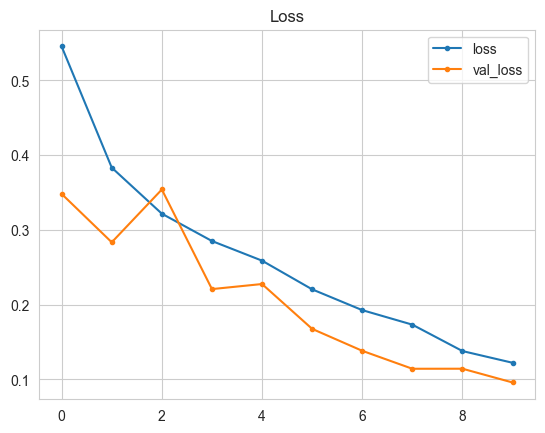

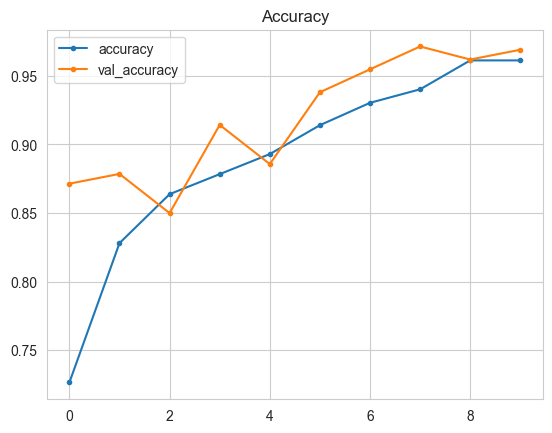

In [32]:
losses = pd.DataFrame(model.history.history)  # Create a DataFrame from the model's training history

sns.set_style("whitegrid")  # Set the style of the plot to whitegrid
losses[['loss', 'val_loss']].plot(style='.-')  # Plot the training and validation loss values
plt.title("Loss")  # Set the title of the plot to "Loss"
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)  # Save the plot as an image file
plt.show()  # Display the plot

print("\n")  # Print a newline character for separation

losses[['accuracy', 'val_accuracy']].plot(style='.-')  # Plot the training and validation accuracy values
plt.title("Accuracy")  # Set the title of the plot to "Accuracy"
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)  # Save the plot as an image file
plt.show()  # Display the plot

### Load the saved best model

In [31]:
from keras.models import load_model

load_model('outputs/v1/powdery_mildew_model.h5')

### Accuracy

- The model's performance on the test set successfully meets the predetermined project requirements, exhibiting a commendable accuracy of at least 87%. This accomplishment effectively addresses and fulfills the stipulated Business Requirement #2.

In [33]:
evaluation = model.evaluate(test_set, batch_size=batch_size)
print("Model accuracy: {:.2f}%".format(evaluation[1] * 100))
print("Model Loss: ",evaluation[0])

53/53 [==============================] - 2s 45ms/step - loss: 0.1050 - accuracy: 0.9751
Model accuracy: 97.51%
Model Loss:  0.1050322949886322


### Set the accuracy variables

In [34]:
validation_set.reset()

x_true, y_true = next(test_set)
preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels

53/53 [==============================] - 3s 45ms/step


### Save the Evaluation Pickle

In [39]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

### Predict on new data

> Loads a random image as PIL

Image shape: (256, 256), Image mode: RGB


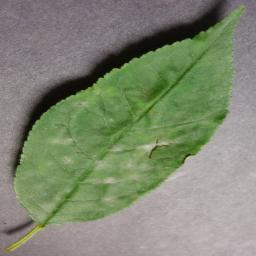

In [40]:
from tensorflow.keras.preprocessing import image

# Set the pointer to 66, representing the index of the image to load
pointer = 66

# Select the label to use, such as "healthy" or "powdery_mildew"
label = labels[0]

# Construct the file path to the image to be loaded from the test set
image_path = test_path + '/' + label + '/' + os.listdir(test_path + '/' + label)[pointer]

# Load the image using Keras' image.load_img() function
# Set the target size to image_shape and color mode to "rgb"
pil_image = image.load_img(image_path, target_size=image_shape, color_mode='rgb')

# Print the shape and mode of the loaded image
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')

# Display the image
pil_image

### Converts the image to an array and prepare it for prediction

In [41]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


### Predict the class probabilities

In [42]:
# Predict the probability of the image belonging to the positive class
pred_proba = model.predict(my_image)[0, 0]

# Create a target map to map the class indices to their corresponding labels
target_map = {v: k for k, v in train_set.class_indices.items()}

# Determine the predicted class based on the predicted probability
pred_class = target_map[pred_proba < 0.5]

# If the predicted class is the positive class, calculate the complement of the probability
if pred_class == target_map[1]:
    pred_proba = 1 - pred_proba

# Print the predicted class and the probability as a percentage
print(f"{pred_class} {round(pred_proba * 100, 2)}%")

1/1 [==============================] - 0s 53ms/step
powdery_mildew 91.59%


# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
